#### Import statements

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler ,StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

### Importing the dataset 
<p><b> Important parameters: </b><br> 
    Number of instances: 302  <br>
    Number of attributes: 14 continuous attributes  </p>
<b> Each of the attributes: </b><br>      
    age: Age in years  <br>  
        -continuous  <br>
    sex: (1= male, 0= female) <br>  
        - nominal <br>
    cp: Chest pain type (Value 1: typical angina, Value 2: atypical angina, Value3: non-aginal pain, Value 4: asymptomatic)<br>
        - ordinal<br>
        - 1->3->2->4<br>
    trestbps: Resting blood pressure (in mmHg on admission to the hospital)  <br>
        -continuous<br>
    chol: Serum Cholestoral in mg/dl  <br>
        -continuous<br>
    fbs: fast blood sugar > 120 mg/dl (1= true, 0=false)  <br>
        -nominal<br>
    restecg: Resting electrocardiographic results (0: normal, 1: having ST-T wave abnormality (T wave inversions and/or St elevation or depression of > 0.05mV, 2: showing probabal or definite left ventricular hypertrophy by Estes'criteria)  <br>
        -ordinal <br>
    thalach: Maximum heart rate achieved<br>
        -continuous<br>
    exang: Excercise included angina (1= yes, 0=no)<br>
     - nominal <br>  
    oldpeak: ST depression indced by exercise relative to rest <br> 
    -continuous <br> 
    slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping) <br> 
    -ordinal <br>
    ca : Number of major vessels (0-3) colored by flourosopy <br>
    -reverse ordinal <br> 
    thal(Thallium Stress Test Results): 3= normal, 6= fixed defect, 7= reversable defect<br>
        -ordinal <br>
    HeartDisease: Diagnosis of heart disease- angiprahic disease status (Value 0: <50% diameter narrowing, Value 1: > 50% diameter narrowing) in any major vessel: attributes 59 through 68 are vessels  


In [80]:
HDNames= ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','HeartDisease']
data = pd.read_excel('Ch3.ClevelandData.xlsx', names=HDNames)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,HeartDisease
0,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
1,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


Inference from Analysing the raw data  
- only - age , trestbps , chol , thalach and oldpeak are numerical fetures
- all the other features are categorical values 
(we don't scale categorical data)


### Preprocessing 

#### Data Cleaning

Handling missing values

In [85]:
data = data.replace('?', np.nan)
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           302 non-null    int64  
 1   sex           302 non-null    int64  
 2   cp            302 non-null    int64  
 3   trestbps      302 non-null    int64  
 4   chol          302 non-null    int64  
 5   fbs           302 non-null    int64  
 6   restecg       302 non-null    int64  
 7   thalach       302 non-null    int64  
 8   exang         302 non-null    int64  
 9   oldpeak       302 non-null    float64
 10  slope         302 non-null    int64  
 11  ca            298 non-null    float64
 12  thal          300 non-null    float64
 13  HeartDisease  302 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.2 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  30

C:\Users\rishi\AppData\Local\Temp\ipykernel_10980\3320146366.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace('?', np.nan)


- Since there are only 6 missing values we will remove them from the dataset  
- we will count total positive and negative cases - check imbalance

In [87]:
dataNew = data.dropna()
print(dataNew.info())
heart_disease_counts = dataNew['HeartDisease'].value_counts()
print(heart_disease_counts)

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 300
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           296 non-null    int64  
 1   sex           296 non-null    int64  
 2   cp            296 non-null    int64  
 3   trestbps      296 non-null    int64  
 4   chol          296 non-null    int64  
 5   fbs           296 non-null    int64  
 6   restecg       296 non-null    int64  
 7   thalach       296 non-null    int64  
 8   exang         296 non-null    int64  
 9   oldpeak       296 non-null    float64
 10  slope         296 non-null    int64  
 11  ca            296 non-null    float64
 12  thal          296 non-null    float64
 13  HeartDisease  296 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.7 KB
None
HeartDisease
0    159
1    137
Name: count, dtype: int64


Visualizing the data

In [89]:
dataNew["age"].value_counts

<bound method IndexOpsMixin.value_counts of 0      67
1      67
2      37
3      41
4      56
       ..
296    57
297    45
298    68
299    57
300    57
Name: age, Length: 296, dtype: int64>

<Axes: xlabel='age', ylabel='count'>

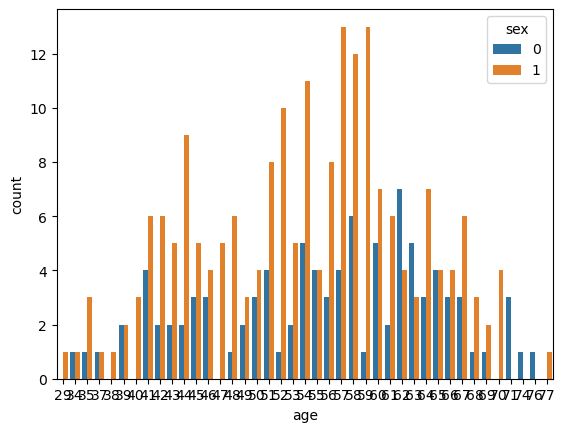

In [90]:
sns.countplot(data=dataNew, x="age", hue="sex")

<Axes: xlabel='trestbps', ylabel='Count'>

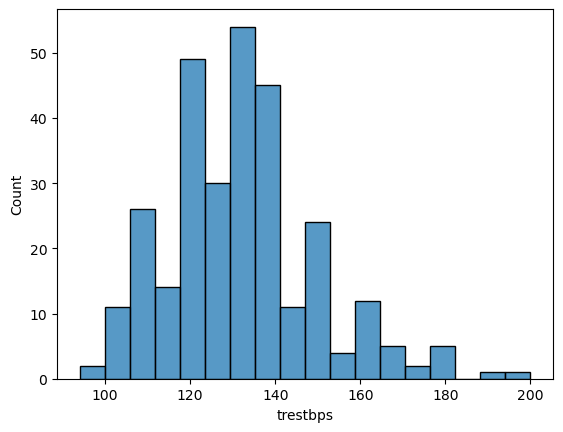

In [91]:
sns.histplot(data=dataNew, x="trestbps")

C:\Users\rishi\AppData\Local\Temp\ipykernel_10980\859757850.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataNew["oldpeak"])


<Axes: xlabel='oldpeak', ylabel='Density'>

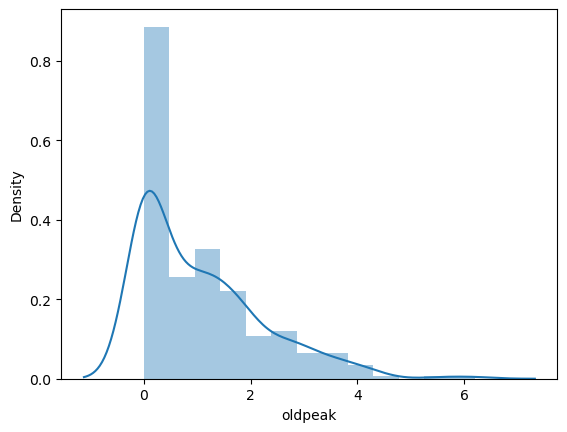

In [92]:
sns.distplot(dataNew["oldpeak"])

C:\Users\rishi\AppData\Local\Temp\ipykernel_10980\1855541271.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataNew["chol"])


<Axes: xlabel='chol', ylabel='Density'>

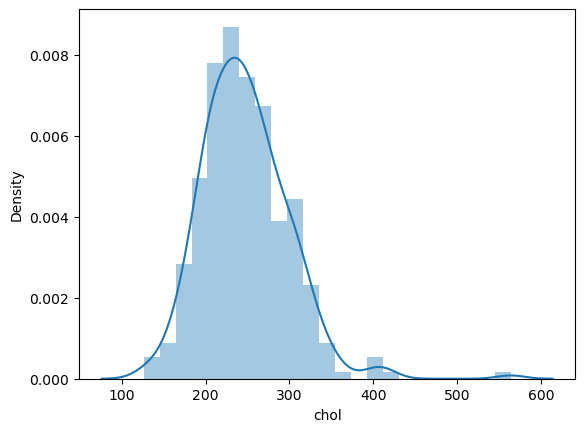

In [93]:
sns.distplot(dataNew["chol"])

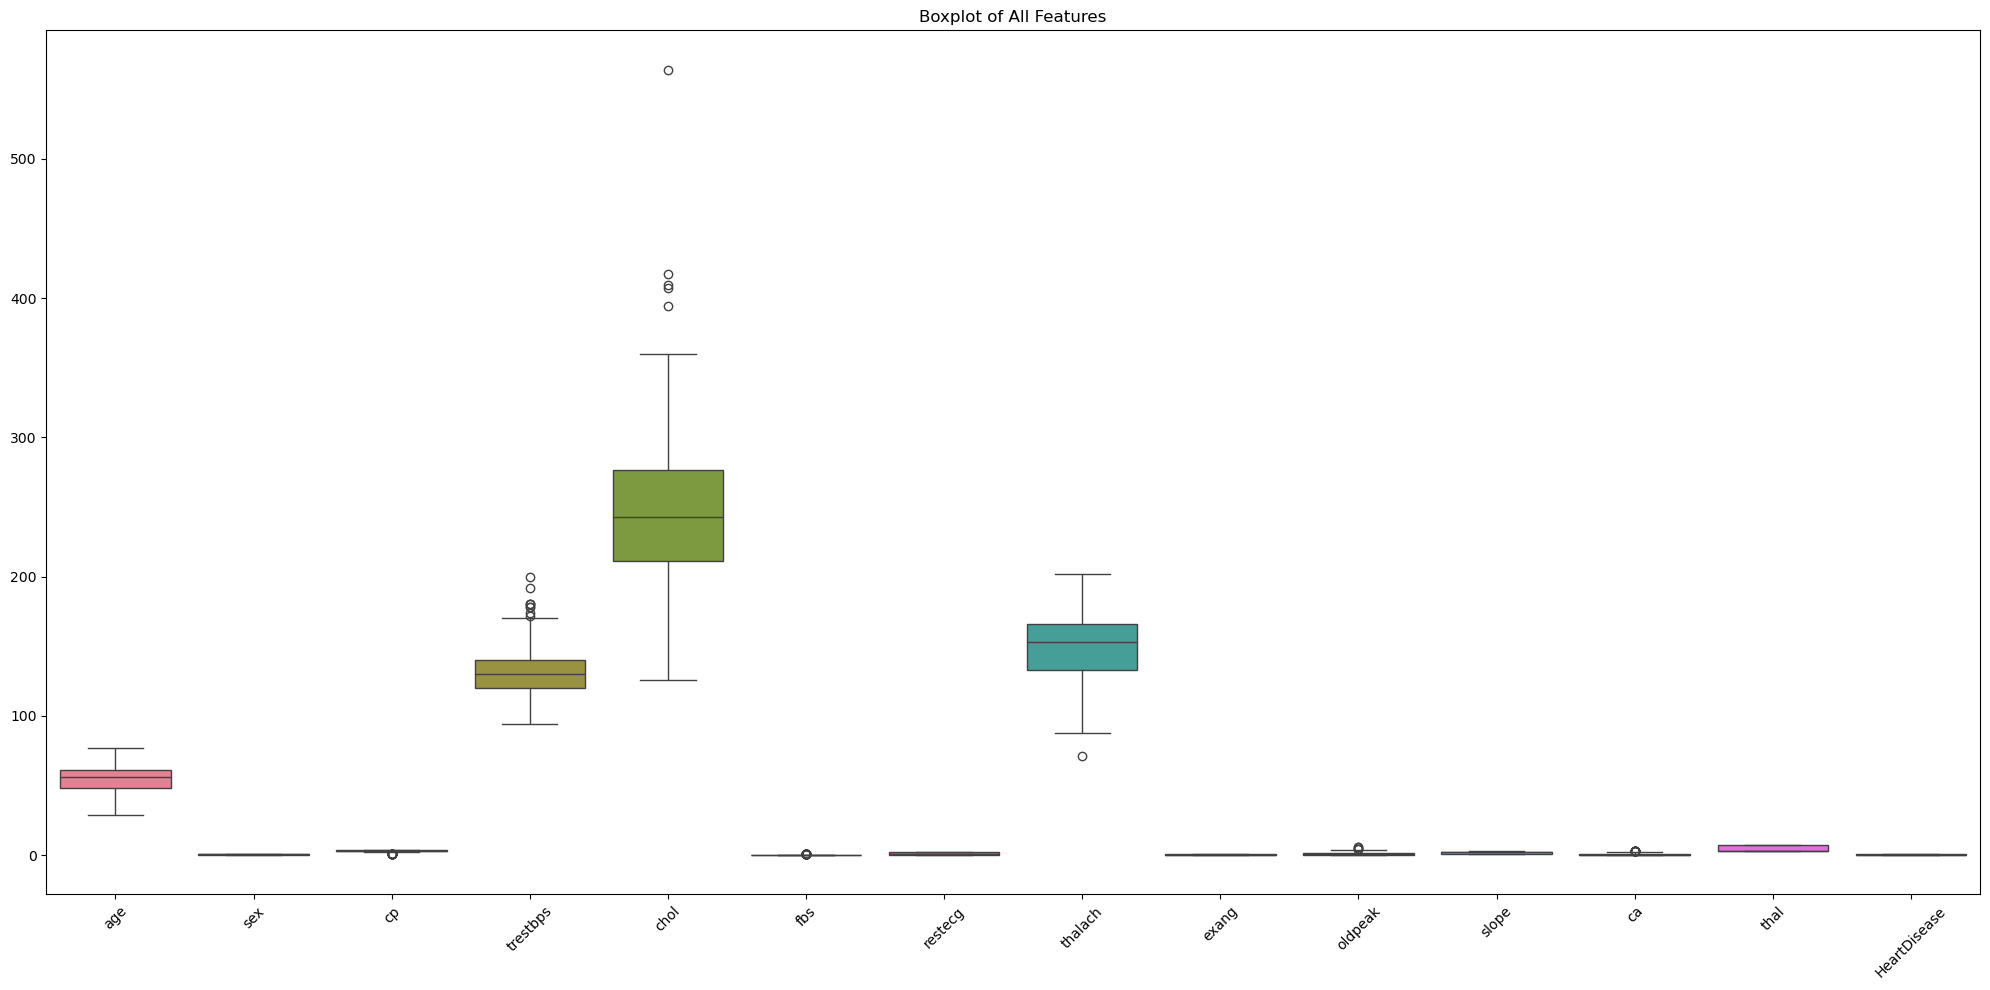

In [94]:
plt.figure(figsize=(20, 10)) 
sns.boxplot(data=dataNew)

plt.xticks(rotation=45) 
plt.title('Boxplot of All Features')
plt.tight_layout()
plt.show()

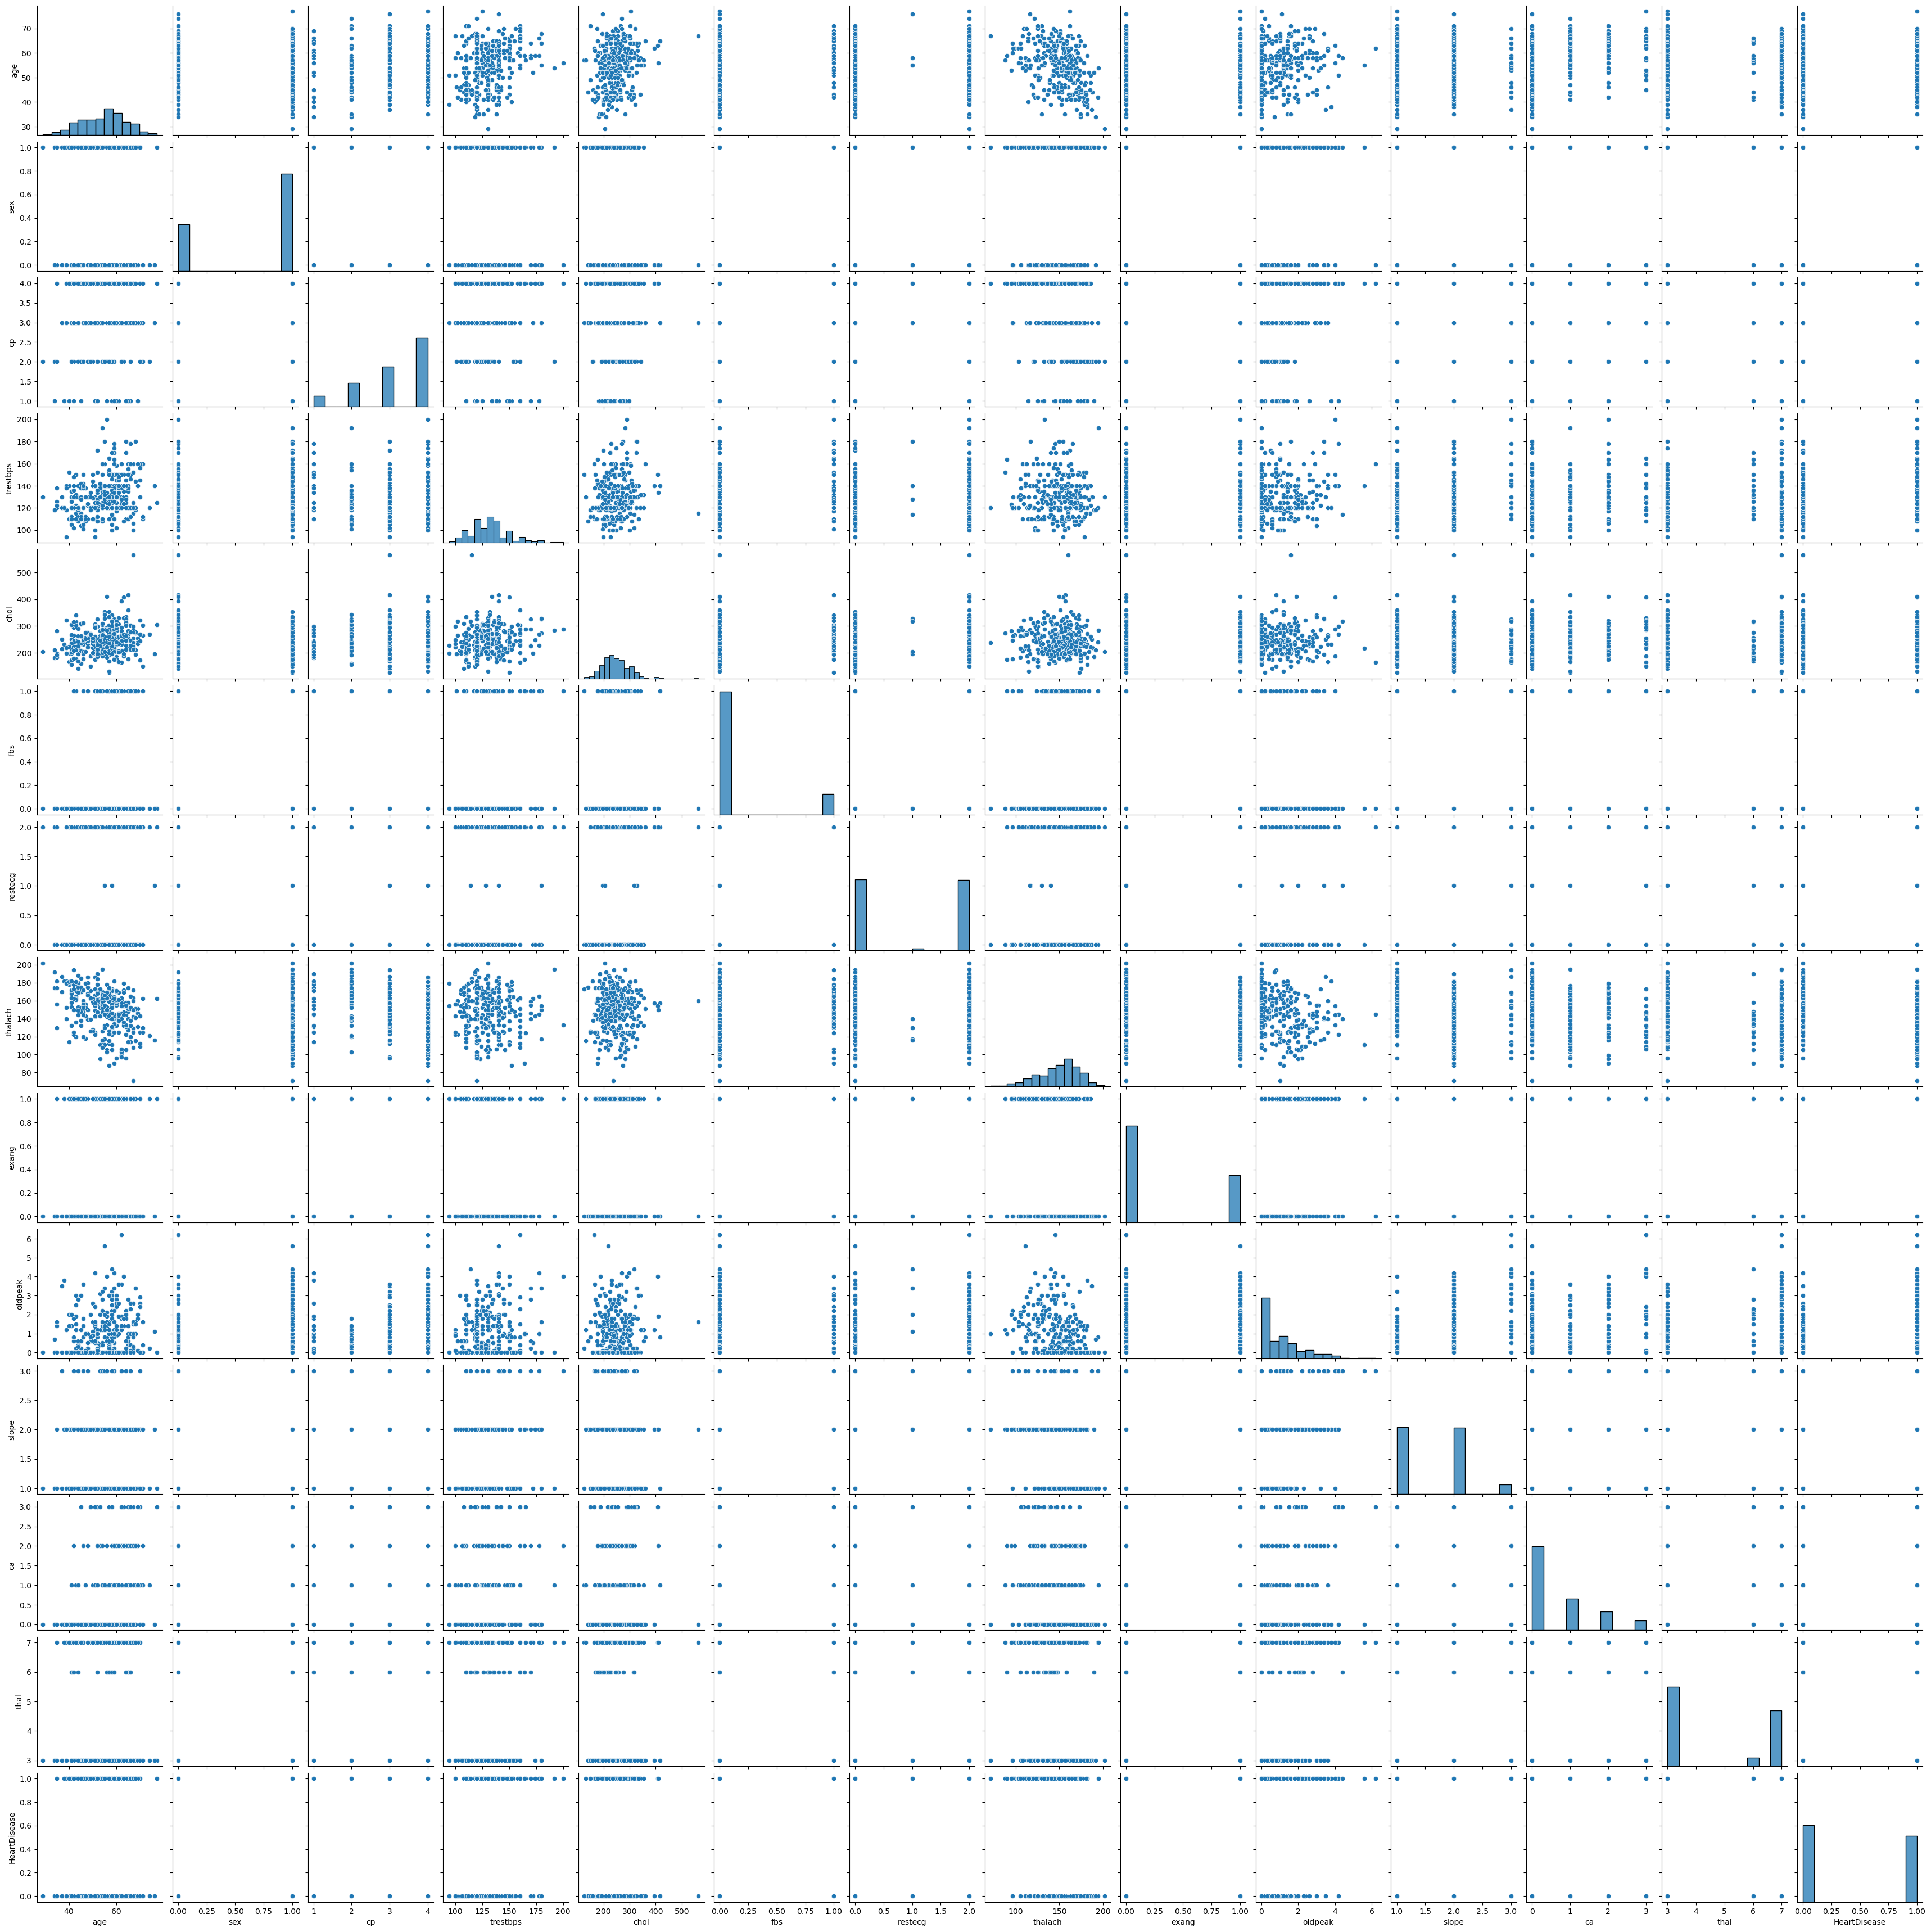

In [95]:
# Create a pairplot of the dataset
sns.pairplot(dataNew)
plt.show()

Removing outliers
- we can infer from the plot that oldpeak has some outliars we will clip oldpeak>5 and cholestrol>500 as these values are extremely rare in real world scenarios

In [97]:
#remove or clip the old peak value greater than 5 
dataNew.loc[:, 'oldpeak'] = dataNew['oldpeak'].clip(upper=5)
# dataNew = dataNew[dataNew['oldpeak'] <= 5]

# Remove the row with chol greater than 500
# dataNew = dataNew[dataNew['chol'] <= 500]
dataNew.loc[:, 'chol'] = dataNew['chol'].clip(upper=500)

# Display the updated dataframe
print(dataNew.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  296.000000  296.000000  296.000000  296.000000  296.000000  296.000000   
mean    54.513514    0.675676    3.165541  131.648649  247.182432    0.141892   
std      9.051631    0.468915    0.958262   17.775956   50.879057    0.349530   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.250000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  500.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  296.000000  296.000000  296.000000  296.000000  296.000000  296.000000   
mean     0.993243  149.597973    0.327703    1.045270    1.597973    0.679054   
std      0.994879   22.9804

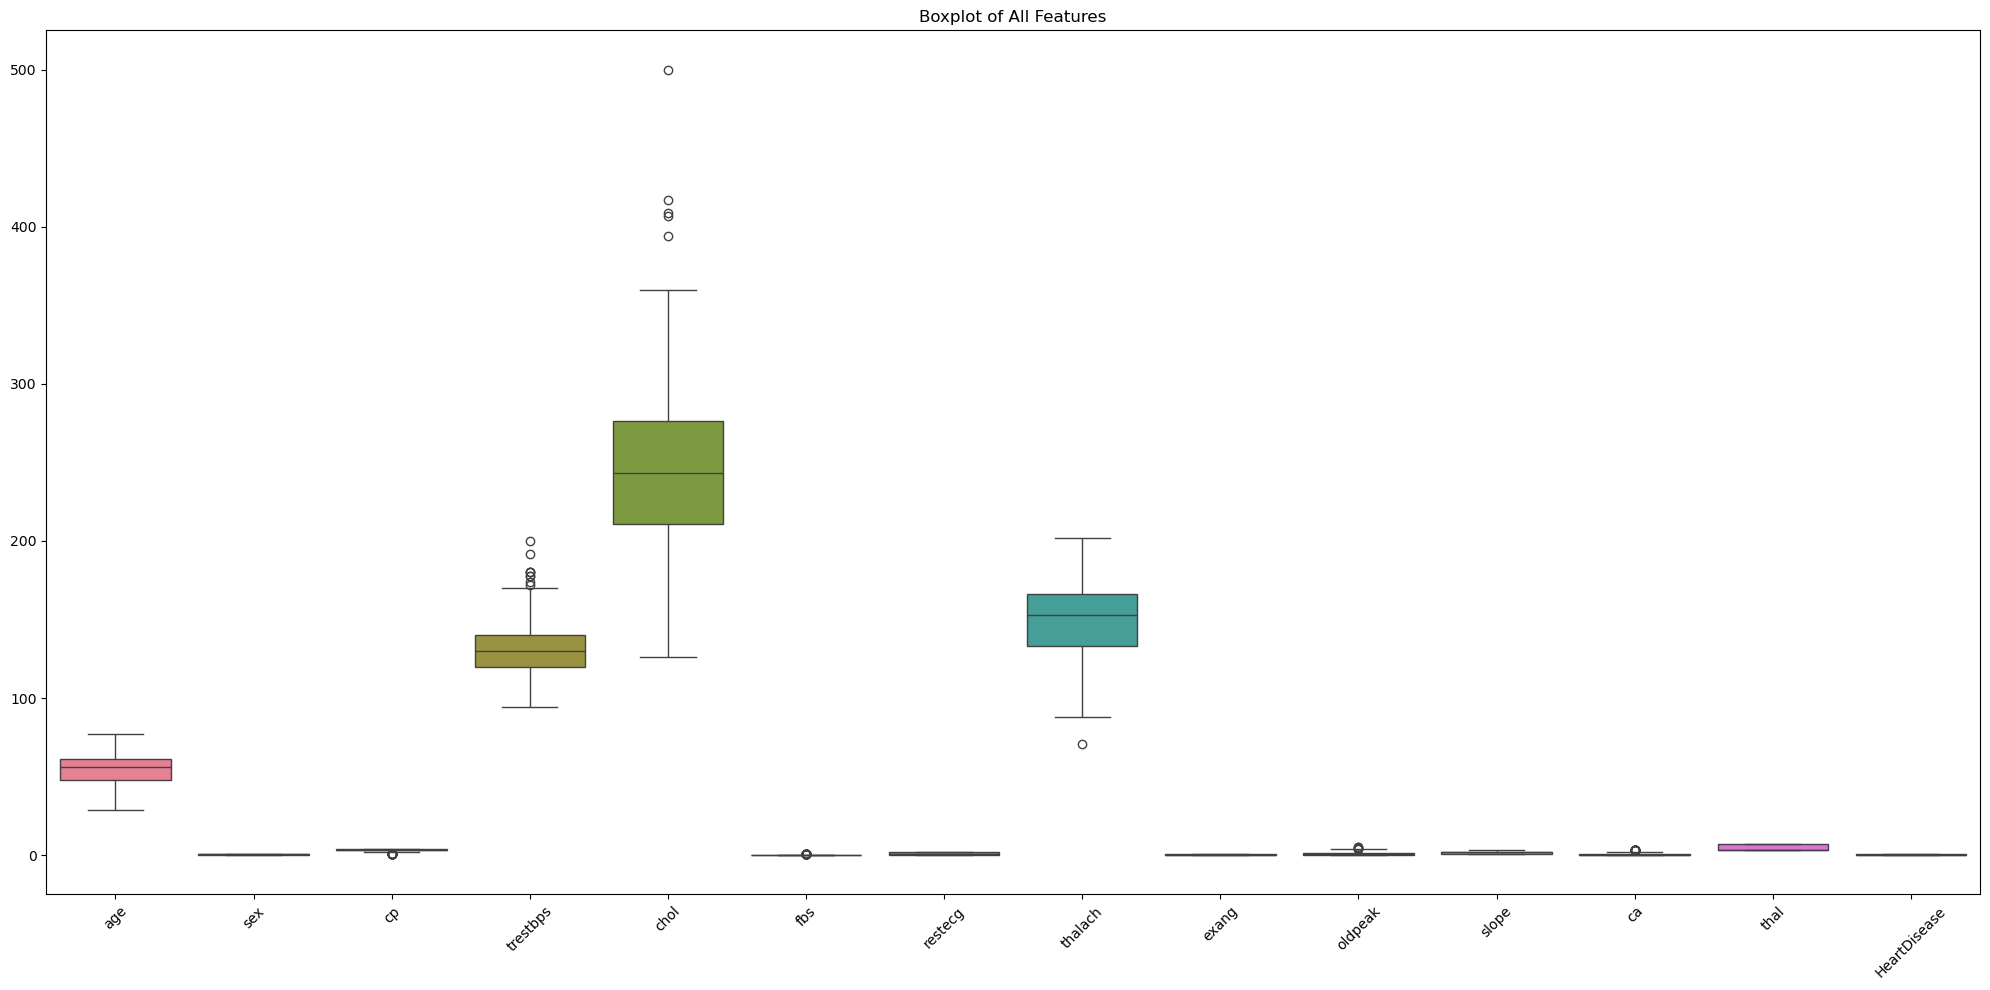

In [98]:
plt.figure(figsize=(20, 10)) 
sns.boxplot(data=dataNew)

plt.xticks(rotation=45) 
plt.title('Boxplot of All Features')
plt.tight_layout()
plt.show()

C:\Users\rishi\AppData\Local\Temp\ipykernel_10980\3155473894.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HeartDisease', y=col, data=dataNew, palette='muted')
C:\Users\rishi\AppData\Local\Temp\ipykernel_10980\3155473894.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HeartDisease', y=col, data=dataNew, palette='muted')
C:\Users\rishi\AppData\Local\Temp\ipykernel_10980\3155473894.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HeartDisease', y=col, data=dataNew, palette='muted')
C:\Users\rishi\AppData\Local\Te

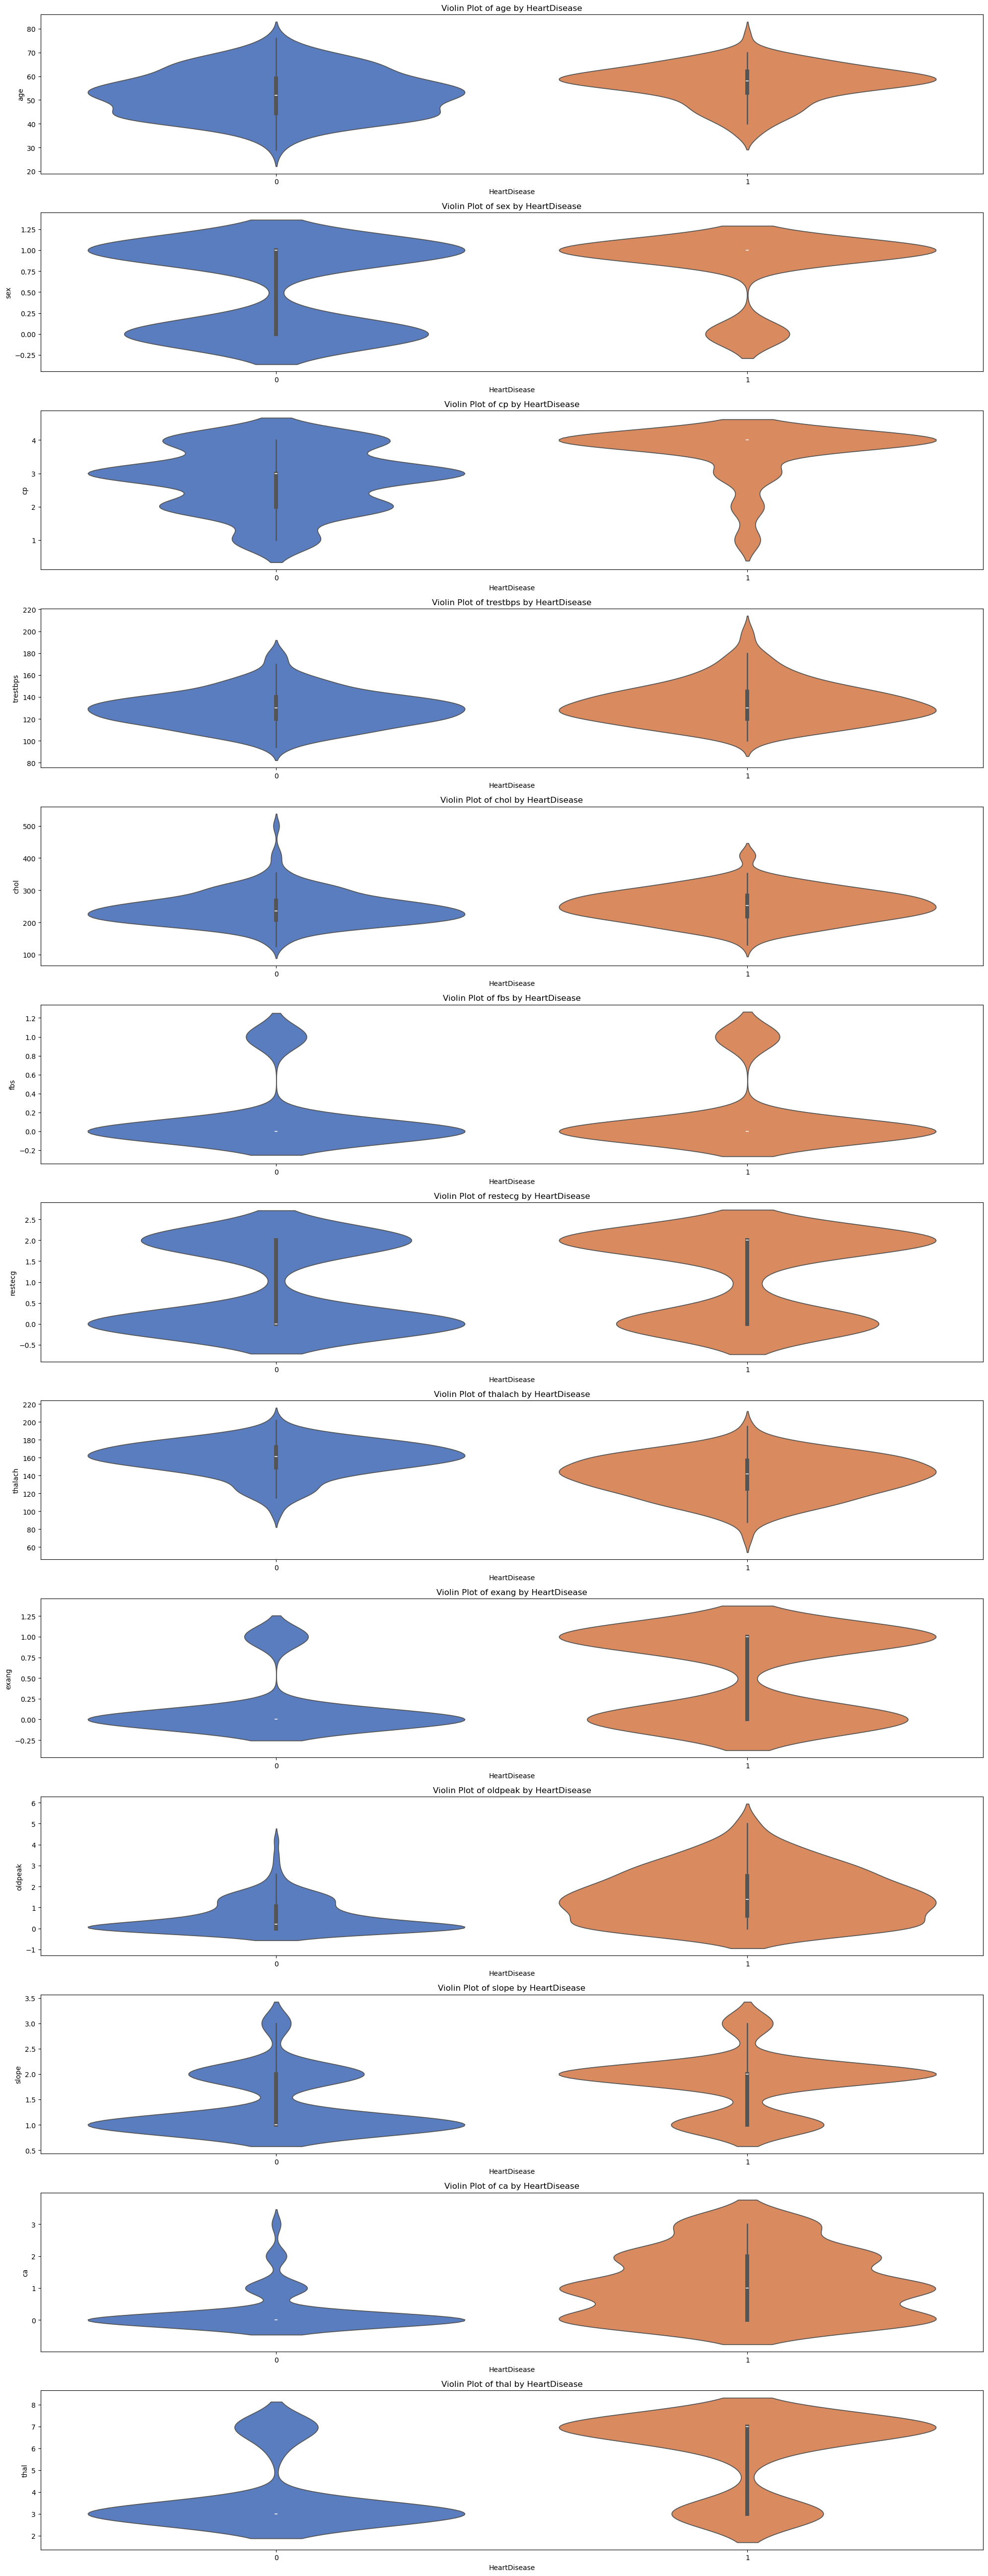

In [127]:
features = dataNew.columns.drop('HeartDisease')
plt.figure(figsize=(20, len(features) * 4))

for i, col in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    sns.violinplot(x='HeartDisease', y=col, data=dataNew, palette='muted')
    plt.title(f'Violin Plot of {col} by HeartDisease')
    plt.tight_layout()

plt.show()

#### Data tranformation
- one-hot encoding for categorical fetures which are nominal
- min-max normalization for numerical features
- label incoding for cordinal features to preserve order  
<p>nominal = sex , fbs , exang  <br>      
ordinal = cp, resteng, cp, thal,slope  <br>    
numerical = age , trestbps, chol, thalach, oldpeak - scalar  </p>

In [100]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
nominal_features=['sex','fbs','exang']
ordinal_features=['cp','restecg','slope','ca','thal']
target='HeartDisease'

x = dataNew.drop(columns=[target])
y = dataNew[target]

preprocessor = ColumnTransformer([
    ('num', MinMaxScaler(), numerical_features),  # Normalize numerical features
    ('cat', OneHotEncoder(handle_unknown='ignore'), nominal_features)  # One-hot encode categorical features
], remainder='passthrough')

transformed_data = preprocessor.fit_transform(x)
# print(transformed_data)

new_feature_names = (numerical_features + 
                     preprocessor.named_transformers_['cat'].get_feature_names_out(nominal_features).tolist() + 
                     ordinal_features)  # Add transformed feature names

data_transformed = pd.DataFrame(transformed_data, columns=new_feature_names)

print(data_transformed.head())
print(data_transformed.describe())


        age  trestbps      chol   thalach  oldpeak  sex_0  sex_1  fbs_0  \
0  0.791667  0.622642  0.427807  0.282443     0.30    0.0    1.0    1.0   
1  0.791667  0.245283  0.275401  0.442748     0.52    0.0    1.0    1.0   
2  0.166667  0.339623  0.331551  0.885496     0.70    0.0    1.0    1.0   
3  0.250000  0.339623  0.208556  0.770992     0.28    1.0    0.0    1.0   
4  0.562500  0.245283  0.294118  0.816794     0.16    0.0    1.0    1.0   

   fbs_1  exang_0  exang_1   cp  restecg  slope   ca  thal  
0    0.0      0.0      1.0  4.0      2.0    2.0  3.0   3.0  
1    0.0      0.0      1.0  4.0      2.0    2.0  2.0   7.0  
2    0.0      1.0      0.0  3.0      0.0    3.0  0.0   3.0  
3    0.0      1.0      0.0  2.0      2.0    1.0  0.0   3.0  
4    0.0      1.0      0.0  2.0      0.0    1.0  0.0   3.0  
              age    trestbps        chol     thalach     oldpeak       sex_0  \
count  296.000000  296.000000  296.000000  296.000000  296.000000  296.000000   
mean     0.531532    

#### Data Splitting

In [102]:
# Split into train-test sets
x_train, x_test, y_train, y_test = train_test_split(data_transformed, y, test_size=0.2, random_state=42)
print(x.shape , y.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(296, 13) (296,)
(236, 16)
(60, 16)
(236,)
(60,)


### Training the model

In [104]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [105]:
# Predict on test data
y_pred = model.predict(x_test)

In [106]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.92


In [107]:
import pickle


pickle.dump(model, open('model.pkl','wb'))
pickle.dump(preprocessor, open('preprocessor.pkl','wb'))